<a href="https://colab.research.google.com/github/eduardo20/blazars/blob/master/GBOOST_interactivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

In [0]:
#%%timeit
from google.colab import files
import numpy as np
import sys
sys.path.append('/content/drive/My Drive')
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
!pip install ipynb
import ipynb.fs.full.my_functions_c as mf
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree as tr_
import pydotplus
import collections
#!pip install ipywidgets==7.4
import ipywidgets as widgets
from sklearn.ensemble import GradientBoostingClassifier

# Lista de caracteristicas posibles del modelo, de entre ellas se prueban disitintas selecciones:
features_=['ra', 'dec', 'flux_1_100_gev', 'spectral_index', 'spectral_index_error',
          'detection_significance', 'lii', 'bii', 'pivot_energy', 'flux_density',
          'flux_density_error', 'energy_flux', 'energy_flux_error',
          'curve_significance', 'spectrum_type', 'powerlaw_index',
          'flux_100_300_mev', 'flux_100_300_mev_pos_err',
          'flux_100_300_mev_neg_err', 'nufnu_100_300_mev', 'sqrt_ts_100_300_mev',
          'flux_0p3_1_gev', 'flux_0p3_1_gev_pos_err', 'flux_0p3_1_gev_neg_err',
          'nufnu_0p3_1_gev', 'sqrt_ts_0p3_1_gev', 'flux_1_3_gev',
          'flux_1_3_gev_pos_err', 'flux_1_3_gev_neg_err', 'nufnu_1_3_gev',
          'sqrt_ts_1_3_gev', 'flux_3_10_gev', 'nufnu_3_10_gev',
          'sqrt_ts_3_10_gev', 'flux_10_100_gev', 'nufnu_10_100_gev',
          'sqrt_ts_10_100_gev', 'variability_index', 'significance_peak',
          'flux_peak', 'flux_peak_error', 'time_peak', 'time_peak_interval',
          'source_type', 'analysis_flags', 'HR12', 'HR23', 'HR34', 'hard_slope',
          'soft_slope', 'P_E_lg', 'TS_', 'sig_', 'gamm_log', 'Ts_log', 'sig_log',
          'F100_log']

  


# Trabajamos con 3 separciones poblacionales 

1.   pop1
2.   pop2
3.   full




In [0]:
features_=[ 'HR12', 'HR23', 'HR34', 'P_E_lg', 'gamm_log', 'Ts_log',  'spectral_index','source_type']
     
#----------------------------------------------------------------------#
# Carga el dataframe de la poblacion, lo devuelve limpio, separadas las caracteristicas (X sin normalizar, X_std normalizadas) de las etiquetas (y_) más una copia completa del dataframe df0
# Sintaxis:
# X,y_,df0,X_std=load_clean(poblacion(int),features del modelo[lista]) 
X, y_, df0, X_std=mf.load_clean(3,features_)
#----------------------------------------------------------------------#

print ("nº de características del modelo :",len(features_))

Cargando full
(1717, 57)
nº de características del modelo : 8


In [0]:
   
def reduce_features (features_,df):
  from sklearn.preprocessing import StandardScaler
  new_df=df[features_]
  #df.drop(['source_type'], axis=1, inplace=True)
  sc = StandardScaler()
  sc.fit(X)
  #sc.fit(y)
  X_std = sc.transform(X)
  return new_df,X_std
#X,X_std=reduce_features(features_,X) 
#df_UNK=pd.read_excel('/content/drive/My Drive/tree_UNK.xlsx')
#df0.head(20)


In [0]:
from ipywidgets import  interact, widget  
from ipywidgets import  interact_manual
#from ipywidgets  import TwoByTwoLayout, AppLayout, GridspecLayout
from ipywidgets import interactive,interact, HBox, Layout,VBox

from ipywidgets import IntSlider
#size_subset = [0.2,0.25,0.3,0.35,0.4]
#@interact
@widgets.interact_manual(
    color=['blue', 'red', 'green'], lw=(1., 10.))
 


def echo(Save='Salvar archivo como...', size_subset=[0.2, 0.25, 0.3,0.35, 0.4],loss=['friedman_mse'] ,max_depth=[2,3,4,5,6,7,9,10,11],max_features=IntSlider(min=2, max=len(features_)-1, step=1),n_estimators='1000', Save_model=False):
  # hay que devolver X_std normalizado con el numero de caracteriscitcas reducidas usando reduce_features()
  X_train, X_test, y_train, y_test = train_test_split(X_std, y_, test_size=size_subset)
  tree =  GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.11, loss='deviance', max_depth=4,
                           max_features=7, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.4, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
  #tree = DecisionTreeClassifier(criterion=loss, max_depth=max_depth, random_state=0, max_features=max_features)
  clf =tree.fit(X_train, y_train)
  echo.widget.layout.flex_flow='row wrap'
  # widget=interactive(echo,Save='Salvar archivo como...', size_subset=[0.2,0.25,0.3,0.35,0.4],loss=['entropy','gini'],split=100)
  #controls = HBox(widget.children[:-1], layout = Layout(flex_flow='row wrap'))
  #output = widget.children[-1]
  #display(VBox([controls, output]))  


  print("test score: ",tree.score(X_test, y_test))
  print("train score: ",tree.score(X_train, y_train))
  print('Cross validation score with std desv')
 
  a,b=mf.Snippet_192(clf, X_test, y_test)
  print("Accuracy: %0.2f (+/- %0.2f)" % (a , b*2) )
  y_pred = tree.predict(X_test)
  print(confusion_matrix(y_test, y_pred))
  #plt.figure(figsize=(30,15))
  #plt.suptitle("Decision surface of a decision tree using paired features")
  #plt.legend(loc='lower right', borderpad=0, handletextpad=0)
  #plt.axis("tight")
  #arbol=plot_tree(clf, filled=True, feature_names=X.columns)
  #tree
  
  #dot_data = tr_.export_graphviz(clf,
  #                              feature_names=X.columns,
  #                              out_file=None,
  #                              filled=True,
  #                              rounded=True)
  #graph = pydotplus.graph_from_dot_data(dot_data)
  
  #colors = ('brown', 'forestgreen')
  #edges = collections.defaultdict(list)

  #for edge in graph.get_edge_list():
  #    edges[edge.get_source()].append(int(edge.get_destination()))

  #for edge in edges:
  #    edges[edge].sort()    
  #    for i in range(2):
  #        dest = graph.get_node(str(edges[edge][i]))[0]
  #        dest.set_fillcolor(colors[i])

  #graph.write_png('/content/drive/My Drive/tree.png')
  #print('ok1')
  #from IPython.display import Image
  #im_=Image(filename = '/content/drive/My Drive/tree.png')
  #display(im_)
  #return (Image(filename = '/content/drive/My Drive/tree.png')),tree
  if Save_model == True :
    print(' Salvando modelo')
    import pickle

      #from google.colab import files
      #files.download('your typical text file or what ever.txt')
      # Create your model here (same as above)
      #

      # Save to file in the current working directory
    model=tree
    pkl_filename = "/content/drive/My Drive/gbc-pickle_model.pkl"
    with open(pkl_filename, 'wb') as file:
          pickle.dump(model, file)

      # Load from file
    with open(pkl_filename, 'rb') as file:
        pickle_model = pickle.load(file)
  print(clf.__class__.__name__)    
  return tree
  



ok
Test score: 90.70 %
Accuracy: 0.84 (+/- 0.03)


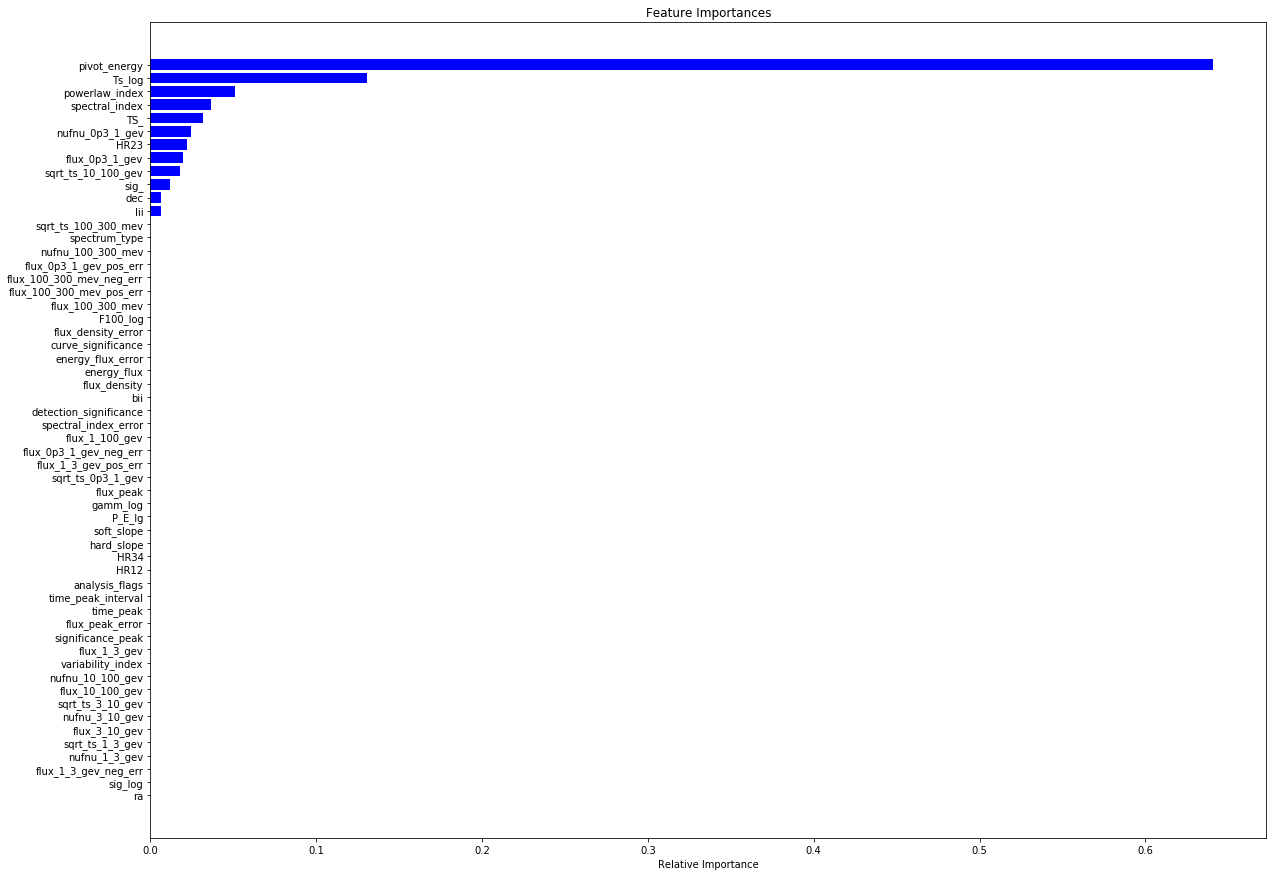

In [0]:
import pickle


# Load from file
pkl_filename = "/content/drive/My Drive/tree(3-1)-pickle_model.pkl"
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
#df_UNK=pd.read_excel('/content/drive/My Drive/tree_UNK.xlsx')
#Calculate the accuracy score and predict target values from recovered model
X_train, X_test, y_train, y_test = train_test_split(X_std, y_, test_size=0.3)
score = pickle_model.score(X_test, y_test)
print('ok')
print("Test score: {0:.2f} %".format(100 * score))
Snippet_192(pickle_model, X_test, y_test)
#tree.feature_importances_
#type(tree.feature_importances_)
# reducir el ´numero de columnas 
#X,X_std=reduce_features(features_,X) 

features = X.columns
importances = pickle_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(20,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Accuracy: 0.84 (+/- 0.04)
Clasificador :  DecisionTreeClassifier
**********************Hoe to evaluate  with learning curves***********************


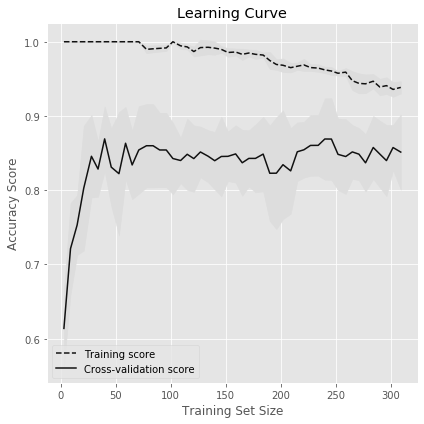

In [0]:
Snippet_192(pickle_model, X_test, y_test)
#Snippet_191(tree, X_test, y_test)
Snippet_188_a(X_test, y_test,pickle_model)

*********************Hoe to visualise cross validation scores*********************
0.7599387603568777


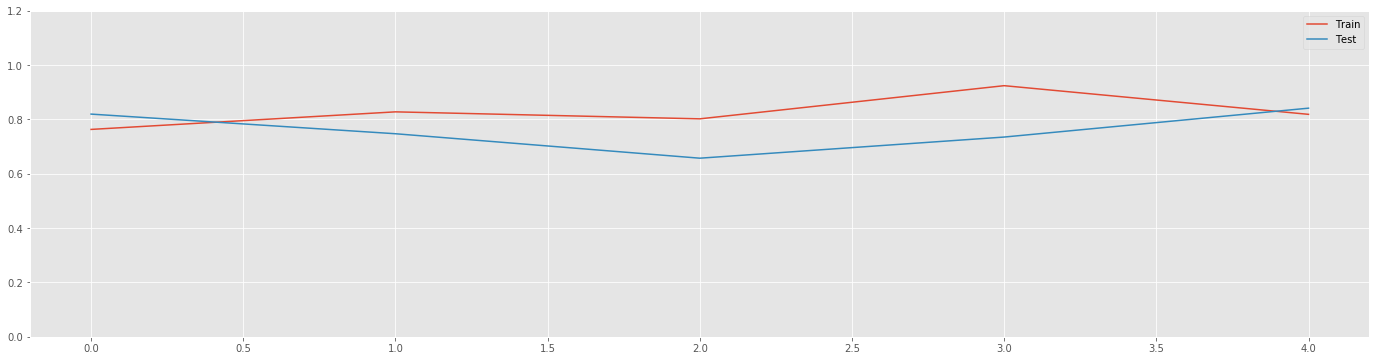

In [0]:
Snippet_190(pickle_model, X_test, y_test, 5)

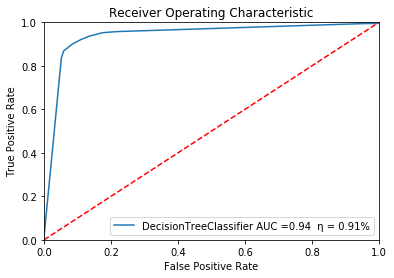

In [0]:
ROC_(pickle_model, X_test,y_test )

#In order to rebuild a similar model with future versions of scikit-learn, additional metadata should be saved along the pickled model:
The training data, e.g. a reference to an immutable snapshot

The python source code used to generate the model

The versions of scikit-learn and its dependencies

The cross validation score obtained on the training data

This should make it possible to check that the cross-validation score is in the same range as before.

In [0]:
import pickle

#from google.colab import files
#files.download('your typical text file or what ever.txt')
# Create your model here (same as above)
#

# Save to file in the current working directory
#model=tree
#pkl_filename = "/content/drive/My Drive/tree(3-1)-pickle_model.pkl"
#with open(pkl_filename, 'wb') as file:
#    pickle.dump(model, file)
#Ojo se queda convertido en cero
df_UNK=pd.read_excel('/content/drive/My Drive/tree_UNK.xlsx')

# Load from file
pkl_filename = "/content/drive/My Drive/tree(3-1)-pickle_model.pkl"
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
#Calculate the accuracy score and predict target values from recovered model

df_pre=df_UNK.copy()
print(df_pre.shape)
df_pre.drop(['source_type','Unnamed: 0'], axis=1, inplace=True)

#normalizamos el dtaframe A PREDECIR
sc = StandardScaler()
sc.fit(df_pre)
df_pre_std = sc.transform(df_pre)

#X_train, X_test, y_train, y_test = train_test_split(X_std, y_, test_size=0.3)
#score = pickle_model.score(X_test, y_test)
#print("Test score: {0:.2f} %".format(100 * score))
#Snippet_192(pickle_model, X_test, y_test)



(573, 58)


#PREDICCION USANDO EL MODELO SALVADO

In [0]:
# REDECIMOS USANDO EL DATAFRAME INCOGNITA CON EL MODELO ENTRENADO, SALVADO Y VUELTO A CARGAR CON PICKLE_MODEL
#-----------------------------------------------------------------#
Ypredict = pickle_model.predict(df_pre_std)
#-----------------------------------------------------------------#
#Ypredict

In [0]:
#df_UNK.head(20)
#df_pre.head(5)
#X_std.shape
#COMPLETAMOS EL DATAFRAME DE LOS BLAZARS DESCONOCIDOS CON NUESTRA PREDICCIÓN 
 #-----------------------------------------------------------------# 
df_UNK['source_type']=Ypredict
df_UNK.head(5)
#-----------------------------------------------------------------#


In [0]:
# RECUENTO DE CLASIFICACION
print ('Bl Lac = 1 -- FSRQ = 0')
df_UNK['source_type'].apply(pd.Series).stack().value_counts()
#Ypredict
